In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import pandas as pd

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the dataset on My Drive
df = pd.read_csv('/content/drive/My Drive/RCStudyCodingFrame2.csv')

df2 = pd.read_csv('/content/drive/My Drive/RC_with_synthetic_sentences.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-Processing

In [3]:
# Preview the non-augmented data
print(df.describe())

               No.        Rapey  1-BlameSurvivor  2-ExcuseBehavior  \
count  5631.000000  5631.000000             16.0              68.0   
mean   2816.000000     0.154502              1.0               1.0   
std    1625.674014     0.361461              0.0               0.0   
min       1.000000     0.000000              1.0               1.0   
25%    1408.500000     0.000000              1.0               1.0   
50%    2816.000000     0.000000              1.0               1.0   
75%    4223.500000     0.000000              1.0               1.0   
max    5631.000000     1.000000              1.0               1.0   

       3-MinimizeAssault  4-ReinforceGenderStereotypes  5-EuphemisticLanguage  \
count               92.0                           0.0                  130.0   
mean                 1.0                           NaN                    1.0   
std                  0.0                           NaN                    0.0   
min                  1.0                     

In [4]:
# Make data lowercase for Bag of Words
df['Sentence_Lower'] = df['Sentence'].str.lower()

In [5]:
# Check for duplicates
print(df.shape)
print(df['Sentence_Lower'].nunique())

(5631, 13)
4803


In [6]:
# Drop duplicates
df = df.drop_duplicates(subset=['Sentence_Lower'])
df.columns

Index(['No.', 'Sentence', 'Rapey', '1-BlameSurvivor', '2-ExcuseBehavior',
       '3-MinimizeAssault', '4-ReinforceGenderStereotypes',
       '5-EuphemisticLanguage', '6-ObscureResponsibility', '7-Victim',
       '8-Lying', '9-Other', 'Sentence_Lower'],
      dtype='object')

In [7]:
print(df.describe())

               No.        Rapey  1-BlameSurvivor  2-ExcuseBehavior  \
count  4803.000000  4803.000000             16.0              47.0   
mean   2778.332709     0.154695              1.0               1.0   
std    1615.418728     0.361651              0.0               0.0   
min       1.000000     0.000000              1.0               1.0   
25%    1390.500000     0.000000              1.0               1.0   
50%    2823.000000     0.000000              1.0               1.0   
75%    4087.500000     0.000000              1.0               1.0   
max    5631.000000     1.000000              1.0               1.0   

       3-MinimizeAssault  4-ReinforceGenderStereotypes  5-EuphemisticLanguage  \
count               68.0                           0.0                  117.0   
mean                 1.0                           NaN                    1.0   
std                  0.0                           NaN                    0.0   
min                  1.0                     

In [8]:
# Split into train and test sets
X = df['Sentence_Lower']
y = df['Rapey']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=500, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# Verify the splits
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 3872
Validation set size: 431
Test set size: 500


# ****Baseline: Bag of Words Model****

In [9]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_tfidf, y_train)

# Evaluate on validation set
y_val_pred = clf.predict(X_val_tfidf)
print("Validation Set Results:\n", classification_report(y_val, y_val_pred))

# Test set performance
y_test_pred = clf.predict(X_test_tfidf)
print("Test Set Results:\n", classification_report(y_test, y_test_pred))


Validation Set Results:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       364
           1       0.69      0.76      0.72        67

    accuracy                           0.91       431
   macro avg       0.82      0.85      0.83       431
weighted avg       0.91      0.91      0.91       431

Test Set Results:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       423
           1       0.58      0.58      0.58        77

    accuracy                           0.87       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.87      0.87      0.87       500



Saved BofW Results:

    Validation Set Results:
    --            precision    recall  f1-score   support

    --      0          0.96      0.94      0.95       364
    --      1          0.69      0.76      0.72        67

    accuracy                               0.91       431
    macro avg          0.82      0.85      0.83       431
    weighted avg       0.91      0.91      0.91       431

    Test Set Results:
    --            precision    recall  f1-score   support

    --     0          0.92      0.92      0.92       423
    --     1          0.58      0.58      0.58        77

    accuracy                               0.87       500
    macro avg          0.75      0.75      0.75       500
    weighted avg       0.87      0.87      0.87       500

# Bag of Words + Enhanced Data

In [10]:
df2.shape

(1200, 12)

In [11]:
df2['Sentence_Lower'] = df2['Sentence'].str.lower()
df2['Sentence_Lower'].nunique()

1165

In [12]:
df2 = df2.drop_duplicates(subset=['Sentence_Lower'])
df2.shape

(1165, 13)

In [13]:
print(df2.describe())

        Rapey  1-BlameSurvivor  2-ExcuseBehavior  3-MinimizeAssault  \
count  1165.0            185.0             189.0              199.0   
mean      1.0              1.0               1.0                1.0   
std       0.0              0.0               0.0                0.0   
min       1.0              1.0               1.0                1.0   
25%       1.0              1.0               1.0                1.0   
50%       1.0              1.0               1.0                1.0   
75%       1.0              1.0               1.0                1.0   
max       1.0              1.0               1.0                1.0   

       4-ReinforceGenderStereotypes  5-EuphemisticLanguage  \
count                           0.0                  200.0   
mean                            NaN                    1.0   
std                             NaN                    0.0   
min                             NaN                    1.0   
25%                             NaN               

In [14]:
# Extract synthetic sentences and labels
X_synthetic = df2['Sentence_Lower']
y_synthetic = df2['Rapey']

# Create enhanced training set by adding synthetic data to the original training set
X_train_enhanced = pd.concat([X_train, X_synthetic])
y_train_enhanced = pd.concat([y_train, y_synthetic])

# Verify the splits
print(f"Original training set size (non-enhanced): {len(X_train)}")
print(f"Enhanced training set size (with synthetic data): {len(X_train_enhanced)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Original training set size (non-enhanced): 3872
Enhanced training set size (with synthetic data): 5037
Validation set size: 431
Test set size: 500


In [15]:
# Convert text to TF-IDF features
X_train_enhanced_tfidf = vectorizer.fit_transform(X_train_enhanced)

# Re-transform validation and test sets with the updated vectorizer
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_enhanced_tfidf, y_train_enhanced)

# Evaluate on validation set
y_val_pred = clf.predict(X_val_tfidf)
print("Validation Set Results:\n", classification_report(y_val, y_val_pred))

# Test set performance
y_test_pred = clf.predict(X_test_tfidf)
print("Test Set Results:\n", classification_report(y_test, y_test_pred))


Validation Set Results:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       364
           1       0.78      0.57      0.66        67

    accuracy                           0.91       431
   macro avg       0.85      0.77      0.80       431
weighted avg       0.90      0.91      0.90       431

Test Set Results:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       423
           1       0.71      0.45      0.56        77

    accuracy                           0.89       500
   macro avg       0.81      0.71      0.75       500
weighted avg       0.88      0.89      0.88       500



# ****BERT****

In [16]:
!pip install datasets

In [17]:
from datasets import Dataset

# Combine text and labels into pandas DataFrames
train_df = pd.DataFrame({'Sentence': X_train, 'label': y_train})
val_df = pd.DataFrame({'Sentence': X_val, 'label': y_val})
test_df = pd.DataFrame({'Sentence': X_test, 'label': y_test})

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

print(train_dataset)


Dataset({
    features: ['Sentence', 'label', '__index_level_0__'],
    num_rows: 3872
})


In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Tokenize datasets
def tokenize_function(example):
    return tokenizer(
        example['Sentence'],
        padding="max_length",
        truncation=True,
        max_length=128,
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/3872 [00:00<?, ? examples/s]

Map:   0%|          | 0/431 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [19]:
# Define/Load the model
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2, problem_type="single_label_classification")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from transformers import TrainingArguments

# Define Training Arguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    seed=42,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Define Metrics

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [22]:
from transformers import Trainer, EarlyStoppingCallback

# Initialize the Hugging Face Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-22-be03b063a859>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [23]:
# Train the model

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: rebecca-bargiachi (rebecca-bargiachi-uc-berkeley). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.221715,0.930394,0.745763,0.862745,0.656716
2,No log,0.177509,0.939675,0.786885,0.872727,0.716418
3,0.304300,0.181634,0.941995,0.812030,0.818182,0.805970


TrainOutput(global_step=726, training_loss=0.25569963586560296, metrics={'train_runtime': 149.9358, 'train_samples_per_second': 77.473, 'train_steps_per_second': 4.842, 'total_flos': 764074504765440.0, 'train_loss': 0.25569963586560296, 'epoch': 3.0})

In [24]:
# Evaluate

test_results = trainer.evaluate(test_dataset)
print(test_results)

{'eval_loss': 0.3742952346801758, 'eval_accuracy': 0.898, 'eval_f1': 0.6433566433566433, 'eval_precision': 0.696969696969697, 'eval_recall': 0.5974025974025974, 'eval_runtime': 1.607, 'eval_samples_per_second': 311.136, 'eval_steps_per_second': 19.913, 'epoch': 3.0}


In [25]:
# Take a look at log history

trainer.state.log_history

[{'eval_loss': 0.22171494364738464,
  'eval_accuracy': 0.9303944315545244,
  'eval_f1': 0.7457627118644068,
  'eval_precision': 0.8627450980392157,
  'eval_recall': 0.6567164179104478,
  'eval_runtime': 1.4284,
  'eval_samples_per_second': 301.741,
  'eval_steps_per_second': 18.903,
  'epoch': 1.0,
  'step': 242},
 {'eval_loss': 0.17750850319862366,
  'eval_accuracy': 0.9396751740139211,
  'eval_f1': 0.7868852459016393,
  'eval_precision': 0.8727272727272727,
  'eval_recall': 0.7164179104477612,
  'eval_runtime': 1.4279,
  'eval_samples_per_second': 301.834,
  'eval_steps_per_second': 18.908,
  'epoch': 2.0,
  'step': 484},
 {'loss': 0.3043,
  'grad_norm': 0.3975319266319275,
  'learning_rate': 6.921898928024503e-06,
  'epoch': 2.0661157024793386,
  'step': 500},
 {'eval_loss': 0.18163393437862396,
  'eval_accuracy': 0.9419953596287703,
  'eval_f1': 0.8120300751879699,
  'eval_precision': 0.8181818181818182,
  'eval_recall': 0.8059701492537313,
  'eval_runtime': 1.3935,
  'eval_samples

# BERT + Enhanced Data

In [26]:
# # Split into train and test sets
# X2 = df2['Sentence_Lower']
# y2 = df2['Rapey']

# X_temp2, X_test2, y_temp2, y_test2 = train_test_split(X2, y2, test_size=500, random_state=42, stratify=y2)

# X_train2, X_val2, y_train2, y_val2 = train_test_split(X_temp2, y_temp2, test_size=0.1, random_state=42, stratify=y_temp2)

# # Verify the splits
# print("Synthetic training set size:", len(X_train2))
# print("Synthetic validation set size:", len(X_val2))
# print("Synthetic test set size:", len(X_test2))

In [27]:
from datasets import Dataset

# Extract synthetic sentences and labels
X_BERT_synthetic = df2['Sentence']

# Create enhanced training set by adding synthetic data to the original training set
X_train_BERT_enhanced = pd.concat([X_train, X_BERT_synthetic])
y_train_BERT_enhanced = pd.concat([y_train, y_synthetic])

# # Validation and test sets remain unchanged
# X_val2 = X_val.copy()
# y_val2 = y_val.copy()
# X_test2 = X_test.copy()
# y_test2 = y_test.copy()

# Limit the number of synthetic examples to 1,000
synthetic_limit = 600
X_synthetic_limited = X_BERT_synthetic.sample(n=synthetic_limit, random_state=42)
y_synthetic_limited = y_synthetic.loc[X_synthetic_limited.index]

# Combine synthetic data with the original training set
X_train_enhanced = pd.concat([X_train, X_synthetic_limited])
y_train_enhanced = pd.concat([y_train, y_synthetic_limited])

# Combine text and labels into pandas DataFrames
train_df2 = pd.DataFrame({'Sentence': X_train_enhanced, 'label': y_train_enhanced})
val_df = pd.DataFrame({'Sentence': X_val, 'label': y_val})
test_df = pd.DataFrame({'Sentence': X_test, 'label': y_test})

# Convert to Hugging Face Datasets
train_dataset2 = Dataset.from_pandas(train_df2)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Print to verify datasets
print(f"Enhanced training dataset size: {len(train_dataset2)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Enhanced training dataset size: 4472
Validation dataset size: 431
Test dataset size: 500


In [28]:
# Tokenize the dataset using Hugging Face's tokenizer for bert-base-cased

train_dataset2 = train_dataset2.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset2.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/4472 [00:00<?, ? examples/s]

Map:   0%|          | 0/431 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [34]:
from transformers import AutoConfig, AutoModelForSequenceClassification

# Load the configuration
config = AutoConfig.from_pretrained("bert-base-cased")

# Set the num_labels and problem_type within the config
config.num_labels = 2
config.problem_type = "single_label_classification"

# Increase dropout (optional)
config.hidden_dropout_prob = 0.3
config.attention_probs_dropout_prob = 0.3

# Now initialize the model with the updated config
model2 = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", config=config
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
# Training arguments

training_args2 = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=8,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    seed=42,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [36]:
# Initialize the Hugging Face Trainer

trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=train_dataset2,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],  # Stop after 1 consecutive epochs of no improvement

)

<ipython-input-36-b4f54443f9f7>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer2 = Trainer(


In [38]:
# Train the model

trainer2.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.274042,0.911833,0.693548,0.754386,0.641791
2,0.349500,0.328559,0.886311,0.691824,0.597826,0.820896


TrainOutput(global_step=560, training_loss=0.34151466233389716, metrics={'train_runtime': 105.162, 'train_samples_per_second': 340.199, 'train_steps_per_second': 21.3, 'total_flos': 665144747950080.0, 'train_loss': 0.34151466233389716, 'epoch': 2.0})

In [33]:
# Evaluate

test_results2 = trainer2.evaluate(test_dataset)
print(test_results2)

{'eval_loss': 0.3832961320877075, 'eval_accuracy': 0.884, 'eval_f1': 0.5245901639344263, 'eval_precision': 0.7111111111111111, 'eval_recall': 0.4155844155844156, 'eval_runtime': 1.6258, 'eval_samples_per_second': 307.544, 'eval_steps_per_second': 19.683, 'epoch': 2.0}


In [39]:
trainer2.state.log_history

[{'eval_loss': 0.2740420401096344,
  'eval_accuracy': 0.9118329466357309,
  'eval_f1': 0.6935483870967742,
  'eval_precision': 0.7543859649122807,
  'eval_recall': 0.6417910447761194,
  'eval_runtime': 1.4262,
  'eval_samples_per_second': 302.207,
  'eval_steps_per_second': 18.932,
  'epoch': 1.0,
  'step': 280},
 {'loss': 0.3495,
  'grad_norm': 7.135152339935303,
  'learning_rate': 1.7261904761904763e-05,
  'epoch': 1.7857142857142856,
  'step': 500},
 {'eval_loss': 0.3285588324069977,
  'eval_accuracy': 0.8863109048723898,
  'eval_f1': 0.6918238993710691,
  'eval_precision': 0.5978260869565217,
  'eval_recall': 0.8208955223880597,
  'eval_runtime': 1.4312,
  'eval_samples_per_second': 301.151,
  'eval_steps_per_second': 18.866,
  'epoch': 2.0,
  'step': 560},
 {'train_runtime': 105.162,
  'train_samples_per_second': 340.199,
  'train_steps_per_second': 21.3,
  'total_flos': 665144747950080.0,
  'train_loss': 0.34151466233389716,
  'epoch': 2.0,
  'step': 560}]

In [40]:
import numpy as np
label_counts = np.unique(train_dataset2['label'].numpy(), return_counts=True)

# Print the unique labels and their counts
for label, count in zip(*label_counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 3273
Label: 1, Count: 1199


Error Analysis

Index(['No.', 'Sentence', 'Rapey', '1-BlameSurvivor', '2-ExcuseBehavior',
       '3-MinimizeAssault', '4-ReinforceGenderStereotypes',
       '5-EuphemisticLanguage', '6-ObscureResponsibility', '7-Victim',
       '8-Lying', '9-Other', 'Sentence_Lower', 'Predicted Label', 'Correct'],
      dtype='object')


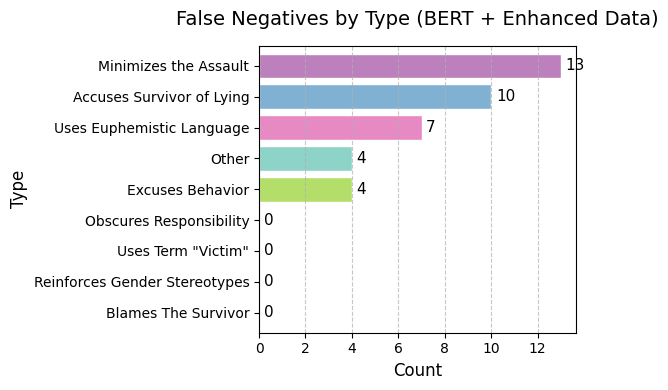

Counts of False Negatives by Type:
Blames The Survivor               0.0
Excuses Behavior                  4.0
Minimizes the Assault            13.0
Reinforces Gender Stereotypes     0.0
Uses Euphemistic Language         7.0
Obscures Responsibility           0.0
Uses Term "Victim"                0.0
Accuses Survivor of Lying        10.0
Other                             4.0
dtype: float64


In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Assuming 'test_analysis_df' and 'type_columns' are defined as in the original code.
type_columns = ["1-BlameSurvivor", "2-ExcuseBehavior", "3-MinimizeAssault", "4-ReinforceGenderStereotypes", "5-EuphemisticLanguage", "6-ObscureResponsibility", "7-Victim", "8-Lying", "9-Other"]

# Get predictions for the test dataset
predictions = trainer2.predict(test_dataset)
logits = predictions.predictions
predicted_labels = np.argmax(logits, axis=-1)

# Instead of directly assigning to df2, create a new DataFrame for the test set
test_df3 = df.loc[X_test.index].copy()

# Now, assign the predicted labels to the test DataFrame
test_df3["Predicted Label"] = predicted_labels
test_df3["Correct"] = test_df3["Rapey"] == test_df3["Predicted Label"]

print(test_df3.columns)

# Filter for false negatives within the test DataFrame
false_negatives = test_df3[(test_df3["Rapey"] == 1) & (test_df3["Predicted Label"] == 0)]

# Analyze type counts (using your type_columns)
type_counts = false_negatives[type_columns].sum()

# Map original column names to new labels
type_labels = {
    "1-BlameSurvivor": "Blames The Survivor",
    "2-ExcuseBehavior": "Excuses Behavior",
    "3-MinimizeAssault": "Minimizes the Assault",
    "4-ReinforceGenderStereotypes": "Reinforces Gender Stereotypes",
    "5-EuphemisticLanguage": "Uses Euphemistic Language",
    "6-ObscureResponsibility": "Obscures Responsibility",
    "7-Victim": 'Uses Term "Victim"',
    "8-Lying": "Accuses Survivor of Lying",
    "9-Other": "Other"
}

fixed_colors = {
    "Blames The Survivor": "#FDB462",
    "Excuses Behavior": "#FFFFB3",
    "Minimizes the Assault": "#CCEBC5",
    "Reinforces Gender Stereotypes": "#e78ac3",
    "Uses Euphemistic Language": "#80B1D3",
    "Obscures Responsibility": "#B3DE69",
    "Uses Term \"Victim\"": "#BC80BD",
    "Accuses Survivor of Lying": "#FB8072",
    "Other": "#8DD3C7"
}

# Rename type counts to use the new labels
type_counts_renamed = type_counts.rename(index=type_labels)

# Sort type counts alphabetically to ensure correct mapping
type_counts_sorted = type_counts_renamed.sort_index()

# Plot horizontal bar chart
ax = type_counts_renamed.sort_values().plot(
    kind="barh",
    figsize=(6, 4),
    color=[fixed_colors[label] for label in type_counts_sorted.index],
    edgecolor="white",
    width=0.8
)

# Add annotations to each bar
for i, v in enumerate(type_counts_renamed.sort_values()):
    ax.text(v + 0.2, i, str(int(v)), color="black", va="center", fontsize=11)

# Customize the chart
plt.title("False Negatives by Type (BERT + Enhanced Data)", fontsize=14, pad=15)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

# Print counts for clarity
print("Counts of False Negatives by Type:")
print(type_counts_renamed)


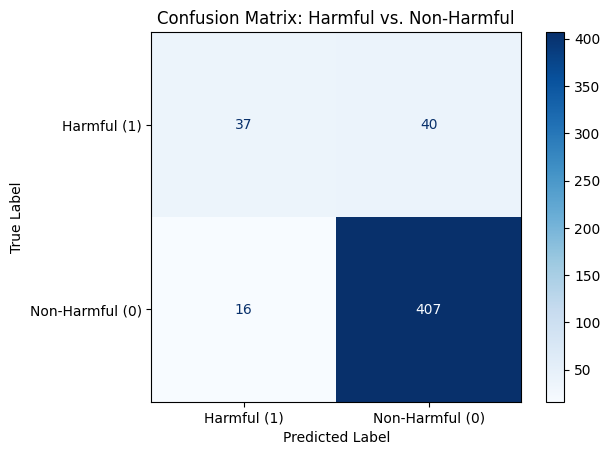

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract true labels and predicted labels
y_true = test_df3["Rapey"].to_numpy() if isinstance(test_df3["Rapey"], pd.Series) else test_df3["Rapey"]
y_true = [int(label) for label in y_true]
y_pred = test_df3["Predicted Label"].values

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Harmful (1)", "Non-Harmful (0)"])
disp.plot(cmap="Blues", values_format="d")

# Customize plot
plt.title("Confusion Matrix: Harmful vs. Non-Harmful")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [44]:
# Check if any false negatives have no type annotations
fn_without_types = false_negatives[type_columns].sum(axis=1) == 0
num_fn_without_types = fn_without_types.sum()

print(f"Number of False Negatives Without Any Type Annotations: {num_fn_without_types}")


Number of False Negatives Without Any Type Annotations: 2


In [45]:
# Iterate through each type column to extract examples of false negatives
for type_column in type_columns:
    # Get examples of false negatives for the current type
    type_false_negatives = false_negatives[false_negatives[type_column] == 1]

    # Get the label description from the type_labels dictionary
    type_description = type_labels[type_column]

    print(f"\nFalse Negatives for Type: {type_description} ({type_column})")
    print("-" * 60)

    if len(type_false_negatives) > 0:
        # Display up to 5 examples for each type
        for sentence in type_false_negatives["Sentence"].head(7):
            print(f"- {sentence}")
    else:
        print("No false negatives for this type.")



False Negatives for Type: Blames The Survivor (1-BlameSurvivor)
------------------------------------------------------------
No false negatives for this type.

False Negatives for Type: Excuses Behavior (2-ExcuseBehavior)
------------------------------------------------------------
- Most of the suspects, it turns out, were juveniles too.
- A sixth suspect in the attack claims to be a
juvenile and his case is being handled separately.
- But he said the evidence prosecutors presented did not show Noline intended to rape the woman.
- In the filing, Anthony Ricco and Alexandra Shapiro – Combs's latest additions to his legal team – said the music
mogul had promised to ban women from entering his home, undergo weekly drug tests, and to not meet anyone
considered a witness or "co-conspirator" if his release on bail is granted.

False Negatives for Type: Minimizes the Assault (3-MinimizeAssault)
------------------------------------------------------------
- According to an arrest warrant, Ar

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define consistent type-to-color mapping
type_labels = {
    "1-BlameSurvivor": "Blames The Survivor",
    "2-ExcuseBehavior": "Excuses Behavior",
    "3-MinimizeAssault": "Minimizes the Assault",
    "4-ReinforceGenderStereotypes": "Reinforces Gender Stereotypes",
    "5-EuphemisticLanguage": "Uses Euphemistic Language",
    "6-ObscureResponsibility": "Obscures Responsibility",
    "7-Victim": 'Uses Term "Victim"',
    "8-Lying": "Accuses Survivor of Lying",
    "9-Other": "Other"
}

# Rename columns to human-readable labels
type_balance_after = train_df[type_columns].sum().rename(index=type_labels)
type_balance_before = df[type_columns].sum().rename(index=type_labels)

# Define a consistent color palette with explicit colors
fixed_colors = {
    "Blames The Survivor": "#FDB462",
    "Excuses Behavior": "#FFFFB3",
    "Minimizes the Assault": "#CCEBC5",
    "Reinforces Gender Stereotypes": "#e78ac3",
    "Uses Euphemistic Language": "#80B1D3",
    "Obscures Responsibility": "#B3DE69",
    "Uses Term \"Victim\"": "#BC80BD",
    "Accuses Survivor of Lying": "#FB8072",
    "Other": "#8DD3C7"
}

# Sort both datasets alphabetically by index (type labels)
type_balance_after = type_balance_after.sort_index()
type_balance_before = type_balance_before.sort_index()

# Plot for `df2` (After Adding Synthetic Data)
plt.figure(figsize=(6, 4))
type_balance_after.plot(
    kind="barh",
    color=[fixed_colors[label] for label in type_balance_after.index],  # Use fixed colors
    edgecolor="white",
    width=0.8
)
plt.title("Class Balance by Type (After Adding Synthetic Data)", fontsize=12, pad=15)
plt.xlabel("Number of Samples", fontsize=10)
plt.ylabel("Type", fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for `df` (Before Adding Synthetic Data)
plt.figure(figsize=(6, 4))
type_balance_before.plot(
    kind="barh",
    color=[fixed_colors[label] for label in type_balance_before.index],  # Use fixed colors
    edgecolor="white",
    width=0.8
)
plt.title("Class Balance by Type (Before Adding Synthetic Data)", fontsize=12, pad=15)
plt.xlabel("Number of Samples", fontsize=10)
plt.ylabel("Type", fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Print counts for clarity
print("Class Balance by Type (After Adding Synthetic Data):")
print(type_balance_after)

print("\nClass Balance by Type (Before Adding Synthetic Data):")
print(type_balance_before)


KeyError: "None of [Index(['1-BlameSurvivor', '2-ExcuseBehavior', '3-MinimizeAssault',\n       '4-ReinforceGenderStereotypes', '5-EuphemisticLanguage',\n       '6-ObscureResponsibility', '7-Victim', '8-Lying', '9-Other'],\n      dtype='object')] are in the [columns]"

<function matplotlib.pyplot.show(close=None, block=None)>

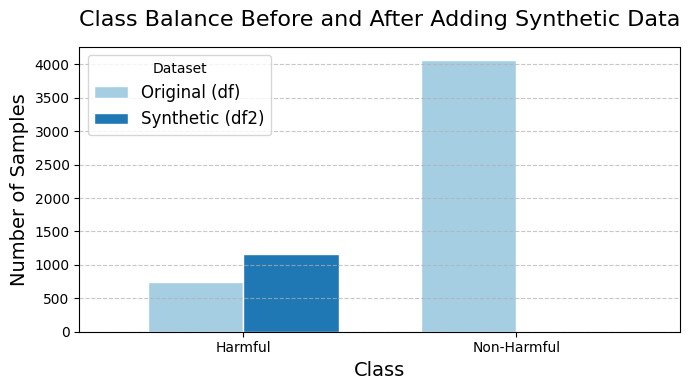

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Count the total samples for each class (0 and 1) in both datasets
class_counts_df = df['Rapey'].value_counts()
class_counts_df2 = df2['Rapey'].value_counts()

# Map class labels to descriptive names
class_labels = {0: "Non-Harmful", 1: "Harmful"}
class_counts_df_renamed = class_counts_df.rename(index=class_labels)
class_counts_df2_renamed = class_counts_df2.rename(index=class_labels)

# Combine counts into a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Original (df)": class_counts_df_renamed,
    "Synthetic (df2)": class_counts_df2_renamed
})

# Define a custom color palette
colors = sns.color_palette("Paired", n_colors=2)

# Plot a grouped bar chart
comparison_df.plot(
    kind="bar",
    figsize=(7, 4),
    color=colors,
    edgecolor="white",
    width=0.7
)

# Customize the chart
plt.title("Class Balance Before and After Adding Synthetic Data", fontsize=16, pad=15)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="Dataset", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show


# GPT-Generated Data


In [18]:
from openai import OpenAI

client = OpenAI(api_key = "Redacted for Github")

KeyboardInterrupt: 

In [ ]:
def generate_synthetic_data(prompt, n_samples=100):
    """
    Generate synthetic sentences using the ChatGPT API.
    """
    synthetic_sentences = []
    for _ in range(n_samples):
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=200,
        )
        synthetic_sentences.append(response.choices[0].message.content.strip())
    return synthetic_sentences

# Victim Blaming
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
  The output should be a news article sentence that perpetuates rape culture by:

  blaming the victim for the assault in some way.
  Victim-blaming refers to language that shifts responsibility from the perpetrator to the victim.

For example, questions like What was she wearing? or Why was he drinking?, descriptions that imply consent was given implicitly
through behavior or attire, and phrases like She seemed willing or He must have misunderstood her signals.
Each output should contain only one sentence, and that sentence should only perpetuate rape culture in one of the previously listed ways.
Only include the sentence, not any additional commentary."""
synthetic_sentences = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences[:200])  # Preview generated data

In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels = [1] * len(synthetic_sentences)
synthetic_df_new = pd.DataFrame({'sentence': synthetic_sentences, 'rapey': synthetic_labels})

# Preview the synthetic data
print(synthetic_df_new.head())

In [ ]:
# Excuses the perpetrator's behavior
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
  The output should be a news article sentence that perpetuates rape culture by:

  Excuses the perpetrator's behavior in some way.
  This includes language that justifies or rationalizes the offender's actions. For example, mentioning stress, alcohol, or external pressures as mitigating factors, using language that portrays the perpetrator as a bad day away from being a good person, or portraying the assault as an isolated incident.

Each output should contain only one sentence, and that sentence should only perpetuate rape culture in one of the previously listed ways.
Only include the sentence, not any additional commentary."""
synthetic_sentences_2 = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences_2[:5])  # Preview generated data


In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels_2 = [1] * len(synthetic_sentences_2)
new_data_df = pd.DataFrame({'sentence': synthetic_sentences_2, 'rapey': synthetic_labels_2})

new_data_df.shape

In [ ]:
# Minimizing Severity
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
 The output should be a unqiue news article sentence that perpetuates rape culture by:

 Minimizing the severity of sexual violence or downplaying the severity or impact of the sexual violence. For example, using statements like It wasn’t a serious offense or
 He didn't mean any harm, and comparing it to less severe offenses.

Each output should contain only one sentence, and each output should be different from the others. Try not to repeat the same idea multiple times.
Only include the sentence, not any additional commentary."""
synthetic_sentences_3 = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences_3[:5])  # Preview generated data


In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels_3 = [1] * len(synthetic_sentences_3)
new_data_df_2 = pd.DataFrame({'sentence': synthetic_sentences_3, 'rapey': synthetic_labels_3})

new_data_df_2.shape

In [ ]:
synthetic_df = pd.concat([synthetic_df_new, new_data_df, new_data_df_2], ignore_index=True)

# Preview the synthetic data
print(synthetic_df)

In [ ]:
# Euphemastic Language
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
 The output should be a unqiue news article sentence that perpetuates rape culture by using euphemistic language.
 Euphemistic language uses softer or indirect terms to describe sexual violence. For example using phrases like non-consensual
 sex or sexual misconduct instead of rape, and terms like sexual impropriety or sexual harassment when referring to severe cases.
 The term alleged is a legal and journalistic standard to indicate that an accusation has been made but not yet proven.
 However, its repeated use in media can sometimes serve to cast doubt on the credibility of the accusation, subtly shifting focus away from the severity of the act itself.

Each output should contain only one sentence, and each output should be different from the others. Try not to repeat the same idea multiple times.
Only include the sentence, not any additional commentary."""
synthetic_sentences_4 = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences_4[:5])  # Preview generated data


In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels_4 = [1] * len(synthetic_sentences_4)
new_data_df_3 = pd.DataFrame({'sentence': synthetic_sentences_4, 'rapey': synthetic_labels_4})

new_data_df_3.shape

In [ ]:
# Obscuring Responsibility
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
 The output should be a unqiue news article sentence that perpetuates rape culture by obscuring responsibility.
  An example of this is language that uses passive voice to obscure responsibility (e.g., An assault occurred instead of John assaulted Jane).

Each output should contain only one sentence, and each output should be different from the others. Try not to repeat the same idea multiple times.
Only include the sentence, not any additional commentary."""
synthetic_sentences_5 = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences_5[:5])  # Preview generated data


In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels_5 = [1] * len(synthetic_sentences_5)
new_data_df_4 = pd.DataFrame({'sentence': synthetic_sentences_5, 'rapey': synthetic_labels_5})

new_data_df_4.shape

In [ ]:
# Lying
prompt = """As part of a research team trying to identify language that perpetuates rape culture,
 your task is to produce sentences that perpetuate rape culture to enhance an existing dataset.
 The goal is to create **high-quality text that mirrors sentences derived from news articles talking about sexual violence**.
 The output should be a unqiue news article sentence that perpetuates rape culture by casting doubt on the survivor's experience.
  An example of this is is playing into the myth that many reports of rape and sexual violence are false accusations, or that the survivor has some motive for lying.

Each output should contain only one sentence, and each output should be different from the others. Try not to repeat the same idea multiple times.
Only include the sentence, not any additional commentary."""
synthetic_sentences_5 = generate_synthetic_data(prompt, n_samples=200)
print(synthetic_sentences_5[:5])  # Preview generated data


In [ ]:
# Create a DataFrame for synthetic data
synthetic_labels_5 = [1] * len(synthetic_sentences_5)
new_data_df_5 = pd.DataFrame({'sentence': synthetic_sentences_5, 'rapey': synthetic_labels_5})

new_data_df_5.shape